In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["FOXP3","IL2RA"]]
initial_gene_marker

,FOXP3,IL2RA
PS001,0.196915,0.116842
PS002,0.037678,1.634623
PS003,0.053440,1.009910
PS004,0.083158,2.767293
PS005,0.066720,0.353793
PS006,0.159466,0.005377
PS007,0.053387,0.955772
PS008,0.146369,0.119391
PS009,0.079699,0.876754
PS010,0.122586,0.238462


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["FOXP3","IL2RA"]]
recurrence_gene_marker

,FOXP3,IL2RA
PS001,0.051262,0.000176
PS002,0.104839,1.415394
PS003,0.059368,0.017560
PS004,0.165933,2.434611
PS005,0.137920,0.102598
PS006,0.264138,0.537702
PS007,0.985629,4.172255
PS008,0.138030,0.271468
PS009,0.219737,0.153226
PS010,0.063998,0.484681


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

,IDH,1p19qcodel
Patient_ID,,
PS001,IDHwt,noncodel
PS002,IDHwt,noncodel
PS003,IDHwt,noncodel
PS004,IDHwt,noncodel
PS005,IDHwt,noncodel
PS006,IDHwt,noncodel
PS007,IDHwt,noncodel
PS008,IDHwt,noncodel
PS009,IDHmut,noncodel


In [10]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,NaN


In [11]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [12]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [13]:
#IL2RA
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "IL2RA"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "IL2RA"]
recurrence.columns = ['Recurrent']
IL2RA_data = initial.join(recurrence)
IL2RA_data

,Initial,Recurrent
PS001,0.116842,0.000176
PS002,1.634623,1.415394
PS003,1.009910,0.017560
PS004,2.767293,2.434611
PS005,0.353793,0.102598
PS006,0.005377,0.537702
PS007,0.955772,4.172255
PS008,0.119391,0.271468
PS009,0.876754,0.153226
PS010,0.238462,0.484681


In [14]:
IL2RA_final = pd.concat([class_data, IL2RA_data], axis=1)
IL2RA_final.index.name = 'Mixture'
IL2RA_final = IL2RA_final.drop(['IDH','1p19qcodel'], axis=1)
IL2RA_final = IL2RA_final.sort_values(by='Mixture')
IL2RA_final

,Molecular Class,Initial,Recurrent
Mixture,,,
PS001,IDH - wildtype,0.116842,0.000176
PS002,IDH - wildtype,1.634623,1.415394
PS003,IDH - wildtype,1.009910,0.017560
PS004,IDH - wildtype,2.767293,2.434611
PS005,IDH - wildtype,0.353793,0.102598
PS006,IDH - wildtype,0.005377,0.537702
PS007,IDH - wildtype,0.955772,4.172255
PS008,IDH - wildtype,0.119391,0.271468
PS009,IDH – mutant (noncodel),0.876754,0.153226


In [15]:
IL2RA_mdf = pd.melt(IL2RA_final.reset_index(), id_vars=('Mixture','Molecular Class'))
IL2RA_mdf

,Mixture,Molecular Class,variable,value
0,PS001,IDH - wildtype,Initial,0.116842
1,PS002,IDH - wildtype,Initial,1.634623
2,PS003,IDH - wildtype,Initial,1.009910
3,PS004,IDH - wildtype,Initial,2.767293
4,PS005,IDH - wildtype,Initial,0.353793
5,PS006,IDH - wildtype,Initial,0.005377
6,PS007,IDH - wildtype,Initial,0.955772
7,PS008,IDH - wildtype,Initial,0.119391
8,PS009,IDH – mutant (noncodel),Initial,0.876754
9,PS010,IDH - wildtype,Initial,0.238462


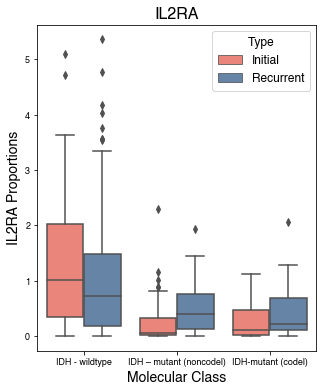

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("IL2RA", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=IL2RA_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("IL2RA Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [17]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = IL2RA_mdf.loc[IL2RA_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=1.3928853366825267, pvalue=0.1636544672483038)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.630912702045204, pvalue=0.0002824207077284678)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.5186527932039984, pvalue=0.1288499149545829)
--------------------------------


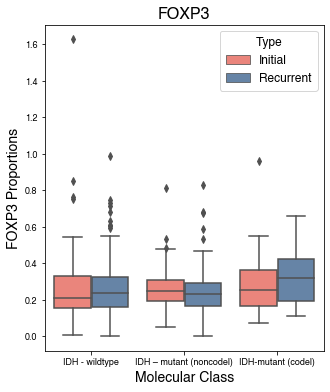

In [18]:
#FOXP3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "FOXP3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "FOXP3"]
recurrence.columns = ['Recurrent']
FOXP3_data = initial.join(recurrence)
FOXP3_final = pd.concat([class_data, FOXP3_data], axis=1)
FOXP3_final.index.name = 'Mixture'
FOXP3_final = FOXP3_final.drop(['IDH','1p19qcodel'], axis=1)
FOXP3_final = FOXP3_final.sort_values(by='Mixture')
FOXP3_mdf = pd.melt(FOXP3_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("FOXP3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=FOXP3_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("FOXP3 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = FOXP3_mdf.loc[FOXP3_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.1170250749539543, pvalue=0.2639836040251238)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.50709255283711, pvalue=0.6120898800892568)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.8542421961772492, pvalue=0.3929708076289561)
--------------------------------
